In [ ]:
import pandas as pd
df_train=pd.read_csv('/content/drive/My Drive/Deep Learning/FakeNewsFinalDataset/CSV/Train.csv')
df_test=pd.read_csv('/content/drive/My Drive/Deep Learning/FakeNewsFinalDataset/CSV/Test.csv')
df_val=pd.read_csv('/content/drive/My Drive/Deep Learning/FakeNewsFinalDataset/CSV/Validation.csv')
df_train

,Unnamed: 0,index,main_img_url,text,title,type
0,0,1,https://static01.nyt.com/images/2016/11/23/us/...,"They stood in line at Trump Tower, sometimes u...","At Donald Trump<U+2019>s Properties, a Showcas...",real
1,1,2,https://static01.nyt.com/images/2016/10/18/us/...,Donald J. Trump <U+2019>s foundation informed ...,Trump Foundation Tells New York It Has Stopped...,real
2,2,3,https://static01.nyt.com/images/2016/11/12/us/...,President-elect Donald J. Trump won the White ...,"Donald Trump Prepares for White House Move, bu...",real
3,3,4,https://static01.nyt.com/images/2016/10/21/bus...,An investment pitch for a new Texas hotel is t...,Luring Chinese Investors With Trump<U+2019>s N...,real
4,4,5,https://static01.nyt.com/images/2016/11/21/us/...,President-elect Donald J. Trump <U+2019>s wife...,Melania and Barron Trump Won<U+2019>t Immediat...,real
...,...,...,...,...,...,...
2831,11598,11599,http://www.pravda.ru/image/article/5/9/2/35459...,0 <U+043A><U+043E><U+043C><U+043C><U+0435><U+0...,<U+041F><U+0443><U+0442><U+0438><U+043D> <U+04...,fake
2832,11599,11600,http://www.pravda.ru/image/preview/article//9/...,0 <U+043A><U+043E><U+043C><U+043C><U+0435><U+0...,<U+0423><U+0447><U+0435><U+043D><U+044B><U+043...,fake
2833,11600,11601,http://www.pravda.ru/image/preview/article//9/...,<U+041C><U+0438><U+0440> <U+00BB> <U+0410><U+0...,<U+041A><U+0443><U+0440><U+0434><U+044B> <U+04...,fake
2834,11601,11602,http://www.pravda.ru/image/article/5/8/9/35458...,0 <U+043A><U+043E><U+043C><U+043C><U+0435><U+0...,<U+041F><U+0440><U+0435><U+0437><U+0438><U+043...,fake


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2836 entries, 0 to 2835
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    2836 non-null   int64 
 1   index         2836 non-null   int64 
 2   main_img_url  2836 non-null   object
 3   text          2836 non-null   object
 4   title         2836 non-null   object
 5   type          2836 non-null   object
dtypes: int64(2), object(4)
memory usage: 133.1+ KB


In [ ]:
X_train=df_train.drop(['Unnamed: 0','main_img_url','type'],axis=1)
X_test=df_test.drop(['Unnamed: 0','main_img_url','type'],axis=1)
X_val=df_val.drop(['Unnamed: 0','main_img_url','type'],axis=1)
X_train.head(5)

,index,text,title
0,1,"They stood in line at Trump Tower, sometimes u...","At Donald Trump<U+2019>s Properties, a Showcas..."
1,2,Donald J. Trump <U+2019>s foundation informed ...,Trump Foundation Tells New York It Has Stopped...
2,3,President-elect Donald J. Trump won the White ...,"Donald Trump Prepares for White House Move, bu..."
3,4,An investment pitch for a new Texas hotel is t...,Luring Chinese Investors With Trump<U+2019>s N...
4,5,President-elect Donald J. Trump <U+2019>s wife...,Melania and Barron Trump Won<U+2019>t Immediat...


In [ ]:
category={'fake':0,'real':1}
y_train=df_train['type'].map(category)
y_test=df_test['type'].map(category)
y_val=df_val['type'].map(category)
y_train.head(5)

0    1
1    1
2    1
3    1
4    1
Name: type, dtype: int64

In [ ]:
print(y_test.value_counts())
print(y_train.value_counts())
print(y_val.value_counts())


1    541
0    456
Name: type, dtype: int64
1    1603
0    1233
Name: type, dtype: int64
0    293
1    233
Name: type, dtype: int64


In [ ]:
messages_train=X_train.copy()
messages_test=X_test.copy()
messages_val=X_val.copy()
messages_train.title[0]

'At Donald Trump<U+2019>s Properties, a Showcase for a Brand and a President-Elect'

### Text Processing

In [ ]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
def clean_text(text):
    text = re.sub(r"<U\+2019>|<U\+2018>", "\'", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " had ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'m", " am", text)
    text = re.sub(r"n\'t", " not", text)
    text= re.sub(r"<U\+.+>",' ',text)
    text = re.sub(r"[\!\?\.\,\+\-\$\%\^\>\<\=\:\;\*\(\)\{\}\[\]\/\~\&\|]", " ", text)
    return text


In [ ]:
words=[]
def create_corpus(messages):
  corpus=[]
  for i in range(len(messages)):
    review=clean_text(messages['title'][i])
    review.lower()
    review=review.split()
    review=[word for word in review if word.isalpha()]
    review=[ps.stem(word) for word in review if word not in stopwords.words('english')]
    for word in review:
      if word not in words:
        words.append(word)
    review=' '.join(review).strip()
    if len(review)==0:
      review='no text'
    corpus.append(review)
  return corpus 


In [ ]:
corpus_train=create_corpus(messages_train)
corpus_test=create_corpus(messages_test)
corpus_val=create_corpus(messages_val)
len(words)

5976

In [ ]:
len(corpus_train),len(corpus_test),len(corpus_val)

(2836, 997, 526)

In [ ]:
corpus_train[0],corpus_test[0],corpus_val[0]

('At donald properti showcas brand presid elect',
 'onli hillari clinton Is prepar nuclear threat wsj',
 'magazin say six peopl corrobor claim trump assault her')

### One Hot Encoding

In [ ]:
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences

In [ ]:
voc_size=6000
onehot_repr_train=[one_hot(words,voc_size) for words in corpus_train]
onehot_repr_test=[one_hot(words,voc_size) for words in corpus_test]
onehot_repr_val=[one_hot(words,voc_size) for words in corpus_val]
len(onehot_repr_train),len(onehot_repr_test),len(onehot_repr_val)

(2836, 997, 526)

In [ ]:
onehot_repr_val

[[2049, 274, 92, 1084, 4070, 3655, 5538, 381, 3109],
 [992, 5538, 4483, 3735, 1681, 1621, 4129, 5676, 136, 3323, 4250],
 [2117, 5185, 2676, 4095, 2731, 5538, 4607],
 [5248, 1084, 2049, 2780, 3752, 715, 5538],
 [618, 2408, 376, 5215, 2475, 3308],
 [5309, 4570, 5538, 1630],
 [1063, 5421, 5140, 3450, 5538, 1105, 5742],
 [992, 3323, 43, 4226, 1859, 1901],
 [3719, 5538, 5379, 1890, 180, 4907, 4738, 2698, 1800],
 [3982, 5943, 3082],
 [5490, 3838, 492, 3525, 5676, 992, 3800, 3082],
 [3769, 863, 3082],
 [4517, 481, 64, 3727, 1162, 992, 5538, 1070, 3655, 3082],
 [3809, 3181, 5773, 3838, 4075, 4469, 5922, 5676, 3082],
 [1906, 143, 1290, 1103, 3158, 57, 5694, 5500, 3082],
 [3838, 3759, 1823, 3295, 2309, 3082],
 [5538, 4962, 672, 4269, 4137, 116, 3082],
 [64, 135, 2445, 4081, 992, 5538, 11, 2967, 5326, 3082],
 [23, 4738, 2040, 3082],
 [1063, 5818, 519, 3721, 2445, 4081, 4962, 2695, 5012, 3082],
 [5538, 3083, 266, 1210, 3800, 1890, 3791, 3082],
 [5762, 4584, 3700, 4348, 5087, 87, 3096, 992, 5538, 3

In [ ]:
onehot_repr_train[0],corpus_train[0]

([5053, 992, 1437, 5648, 2941, 5834, 2512],
 'At donald properti showcas brand presid elect')

In [ ]:
max_sent_len=0
for sent in onehot_repr_train:
  l=len(sent)
  if max_sent_len<l:
    max_sent_len=l
for sent in onehot_repr_test:
  l=len(sent)
  if max_sent_len<l:
    max_sent_len=l
for sent in onehot_repr_val:
  l=len(sent)
  if max_sent_len<l:
    max_sent_len=lmax_sent_len
max_sent_len

37

In [ ]:
embedded_docs_train=pad_sequences(onehot_repr_train,padding='pre',maxlen=max_sent_len)
embedded_docs_test=pad_sequences(onehot_repr_test,padding='pre',maxlen=max_sent_len)
embedded_docs_val=pad_sequences(onehot_repr_val,padding='pre',maxlen=max_sent_len)
embedded_docs_train

array([[   0,    0,    0, ..., 2941, 5834, 2512],
       [   0,    0,    0, ..., 2660, 4862,  266],
       [   0,    0,    0, ..., 4095, 1687,  678],
       ...,
       [   0,    0,    0, ...,    0, 2129, 5240],
       [   0,    0,    0, ...,    0, 2129, 5240],
       [   0,    0,    0, ...,    0, 2129, 5240]], dtype=int32)

In [ ]:
embedded_docs_train[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0, 5053,  992, 1437,
       5648, 2941, 5834, 2512], dtype=int32)

## Feature Extraction

In [ ]:
#Importing Library
import keras
from keras.layers import Dense,Input,Flatten,Dropout
from keras.models import Model,Sequential
from keras.preprocessing.image import img_to_array,load_img
from keras.applications.vgg19 import VGG19,preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Embedding,Dense,Flatten,Concatenate,Bidirectional,LSTM
from keras.layers.merge import add
from keras.utils import plot_model
from keras.optimizers import Adam

In [ ]:
from os import listdir
def extract_features(directory):
    
    # Loading the model
    vgg = VGG19()

    # Removing the last layer from the loaded model as we require only the features not the classification 
    vgg.layers.pop()
    vgg = Model(inputs=vgg.inputs, outputs=vgg.layers[-2].output)
    
    # Summarizing the model 
    print(vgg.summary())

    # Extracting features from each photo and storing it in a dictionary 
    features = dict()
    i=0

    for label in listdir(directory):
      for name in listdir(directory+'/'+label):

        # Defining the path of the image 
        filename = directory + '/'+label+'/' + name
        
        # Loading an image and converting it into size 224 * 224
        image = load_img(filename, target_size=(224, 224))
        
        # Converting the image pixels into a numpy array
        image = img_to_array(image)
        
        # Reshaping data for the model
        image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))

        
        # Preprocessing the images for the VGG model
        # The preprocess_input function is meant to adequate your image to the format the model requires.
        image = preprocess_input(image)

        # Getting features of an image
        feature = vgg.predict(image, verbose=0)
        
        # Getting the image name
        image_id = int(name.split('.')[0])

        feature.reshape(-1)
        # Storing the feature corresponding to the image in the dictionary
        features[image_id] = feature
        i+=1
    
        print(i)
    return features

In [ ]:
train_features=extract_features('/content/drive/My Drive/Deep Learning/FakeNewsFinalDataset/Train')

In [ ]:
train_features

{1728: array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.93819386]], dtype=float32),
 1734: array([[0.       , 0.       , 0.       , ..., 0.       , 0.       ,
         0.9454467]], dtype=float32),
 1755: array([[0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 1810: array([[0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 1803: array([[0.       , 0.       , 0.       , ..., 0.       , 0.       ,
         1.9672085]], dtype=float32),
 1812: array([[2.859414, 0.      , 0.      , ..., 0.      , 0.      , 0.      ]],
       dtype=float32),
 1819: array([[0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 1827: array([[0.       , 1.4523413, 2.7707527, ..., 1.6169811, 0.       ,
         0.       ]], dtype=float32),
 1834: array([[0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 1845: array([[0.       , 0.5725359, 0.       , ..., 0.       , 0.       ,
         0.       ]], dtype=float32),
 1846: array([[0.      , 1.894417, 0.      , ..., 0.      , 0.      , 4.2671

In [ ]:
print(train_features[350])
print(train_features[350].shape)

[[0. 0. 0. ... 0. 0. 0.]]
(1, 4096)


In [ ]:
#sorted_train=sorted(train_features)
new_train_features=dict()
for elem in sorted(train_features.items()):
  new_train_features[elem[0]]=elem[1]


In [ ]:
new_train_features

{45: array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.21600544]], dtype=float32),
 46: array([[0.      , 0.      , 2.504882, ..., 0.      , 0.      , 0.      ]],
       dtype=float32),
 47: array([[0.       , 0.       , 2.0730505, ..., 0.       , 0.       ,
         0.       ]], dtype=float32),
 48: array([[1.9520667, 0.       , 0.       , ..., 0.       , 0.       ,
         0.       ]], dtype=float32),
 49: array([[0.        , 2.7079434 , 0.39898527, ..., 2.5259168 , 0.        ,
         0.        ]], dtype=float32),
 50: array([[1.679987, 1.309047, 4.692047, ..., 0.      , 0.      , 0.      ]],
       dtype=float32),
 51: array([[0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 53: array([[0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 54: array([[0.       , 0.       , 1.3508005, ..., 0.       , 0.       ,
         0.       ]], dtype=float32),
 1938: array([[0.36468267, 0.45124695, 0.        , ..., 0.        , 0.        ,
         0.        ]], dtyp

In [ ]:
from pickle import dump
# Dumping the features in a pickle file for further use
dump(new_val_features, open('/content/drive/My Drive/Deep Learning/FakeNewsFinalDataset/CSV/final_train_features.pkl', 'wb'))

In [ ]:
new_train_features

{1: array([[2.1738706, 3.6156087, 0.       , ..., 1.3026271, 0.8115261,
         0.       ]], dtype=float32),
 2: array([[0.       , 1.6450013, 0.       , ..., 0.       , 0.       ,
         0.       ]], dtype=float32),
 3: array([[0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 4: array([[0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 5: array([[0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 6: array([[0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 8: array([[0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 9: array([[0.        , 0.68948865, 0.        , ..., 0.33292758, 0.        ,
         0.        ]], dtype=float32),
 10: array([[0.     , 0.10457, 0.     , ..., 0.     , 0.     , 0.     ]],
       dtype=float32),
 11: array([[0.        , 0.        , 0.        , ..., 0.        , 2.5192308 ,
         0.82865345]], dtype=float32),
 12: array([[0.      , 1.136544, 0.      , ..., 0.      , 0.      , 0.      ]],
       dtype=float32),
 13: array([[0., 0., 0., ..., 0., 0., 0.]], dtype=fl

## Model

In [ ]:
from pickle import load
train_features=load(open('/content/drive/My Drive/Deep Learning/FakeNewsFinalDataset/CSV/train_features.pkl', 'rb'))
test_features=load(open('/content/drive/My Drive/Deep Learning/FakeNewsFinalDataset/CSV/test_features.pkl', 'rb'))

In [ ]:
import numpy as np
train_lt=list(train_features.values())
train_features=np.array(train_lt)
test_lt=list(test_features.values())
test_features=np.array(test_lt)
train_features.shape,test_features.shape

((2836, 1, 4096), (997, 1, 4096))

In [ ]:
train_img_features=[]
for i in range(len(train_features)):
  train_img_features.append(train_features[i].reshape(-1))
train_features=np.array(train_img_features)
test_img_features=[]
for i in range(len(test_features)):
  test_img_features.append(test_features[i].reshape(-1))
test_features=np.array(test_img_features)
train_features.shape,test_features.shape

((2836, 4096), (997, 4096))

In [ ]:
#new
max_sent_len=37
voc_size=6000

inputs1=Input(shape=(4096,))
fc_img_1=Dense(256,name='fc_img_1',activation='tanh')(inputs1)
fc_img_2=Dense(128,name='fc_img_2',activation='tanh')(fc_img_1)
drop_img_1=Dropout(0.4)(fc_img_2)
fc_img_2=Dense(24,name='fc_img_3',activation='tanh')(drop_img_1)


inputs2=Input(shape=(max_sent_len))
txt_embed = Embedding(voc_size, 32, input_length=max_sent_len, name='txt_embed')(inputs2)
lstm_txt_1 = Bidirectional(LSTM(32, return_sequences=True, name='lstm_txt_1', activation='tanh'))(txt_embed)
lstm_txt_2 = Bidirectional(LSTM(24, return_sequences=True, name='lstm_txt_2', activation='tanh'))(lstm_txt_1)
fc_txt = Dense(24, activation='tanh', name='dense_txt')(lstm_txt_2)
#fc_txt_2=Dropout(0.5)(fc_txt_1)
#fc_txt = Dense(28, activation='tanh', name='fc_txt_2')(fc_txt_2)

#h = Concatenate(axis=-1, name='concat')([fc_txt, fc_img_2])
h=add([fc_txt,fc_img_2])
h1=Flatten()(h)
h2= Dense(24, name='shared', activation='tanh')(h1)
h3=Dropout(0.4)(h2)

fnd=Dense(32,name='fnd',activation='tanh')(h3)
outputs=Dense(1,activation='sigmoid')(fnd)
model=Model(inputs=[inputs1,inputs2],outputs=outputs)
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_10 (InputLayer)           [(None, 37)]         0                                            
__________________________________________________________________________________________________
input_9 (InputLayer)            [(None, 4096)]       0                                            
__________________________________________________________________________________________________
txt_embed (Embedding)           (None, 37, 32)       192000      input_10[0][0]                   
__________________________________________________________________________________________________
fc_img_1 (Dense)                (None, 256)          1048832     input_9[0][0]                    
____________________________________________________________________________________________

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
checkpoint_cb=keras.callbacks.ModelCheckpoint("/content/drive/My Drive/Deep Learning/FakeNewsFinalDataset/CSV/New_Best_Main_Model1.h6",save_best_only=True,monitor='val_accuracy',mode='auto',verbose=1)

In [ ]:
model.fit(x=[train_features,embedded_docs_train],y=y_train,
          validation_data=([test_features,embedded_docs_test],y_test),
          epochs=50,batch_size=128,callbacks=[checkpoint_cb])

Epoch 1/50
23/23 [==============================] - 6s 72ms/step - loss: 0.7035 - accuracy: 0.5722 - val_loss: 0.5772 - val_accuracy: 0.7111

Epoch 00001: val_accuracy improved from -inf to 0.71113, saving model to /content/drive/My Drive/Deep Learning/FakeNewsFinalDataset/CSV/New_Best_Main_Model1.h6


INFO:tensorflow:Assets written to: /content/drive/My Drive/Deep Learning/FakeNewsFinalDataset/CSV/New_Best_Main_Model1.h6/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Deep Learning/FakeNewsFinalDataset/CSV/New_Best_Main_Model1.h6/assets


Epoch 2/50
23/23 [==============================] - 0s 21ms/step - loss: 0.5400 - accuracy: 0.7479 - val_loss: 0.5398 - val_accuracy: 0.7442

Epoch 00002: val_accuracy improved from 0.71113 to 0.74423, saving model to /content/drive/My Drive/Deep Learning/FakeNewsFinalDataset/CSV/New_Best_Main_Model1.h6


INFO:tensorflow:Assets written to: /content/drive/My Drive/Deep Learning/FakeNewsFinalDataset/CSV/New_Best_Main_Model1.h6/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Deep Learning/FakeNewsFinalDataset/CSV/New_Best_Main_Model1.h6/assets


Epoch 3/50
23/23 [==============================] - 0s 21ms/step - loss: 0.4237 - accuracy: 0.8194 - val_loss: 0.4153 - val_accuracy: 0.8375

Epoch 00003: val_accuracy improved from 0.74423 to 0.83751, saving model to /content/drive/My Drive/Deep Learning/FakeNewsFinalDataset/CSV/New_Best_Main_Model1.h6


INFO:tensorflow:Assets written to: /content/drive/My Drive/Deep Learning/FakeNewsFinalDataset/CSV/New_Best_Main_Model1.h6/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Deep Learning/FakeNewsFinalDataset/CSV/New_Best_Main_Model1.h6/assets


Epoch 4/50
23/23 [==============================] - 0s 21ms/step - loss: 0.1759 - accuracy: 0.9451 - val_loss: 0.4303 - val_accuracy: 0.8626

Epoch 00004: val_accuracy improved from 0.83751 to 0.86259, saving model to /content/drive/My Drive/Deep Learning/FakeNewsFinalDataset/CSV/New_Best_Main_Model1.h6


INFO:tensorflow:Assets written to: /content/drive/My Drive/Deep Learning/FakeNewsFinalDataset/CSV/New_Best_Main_Model1.h6/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Deep Learning/FakeNewsFinalDataset/CSV/New_Best_Main_Model1.h6/assets


Epoch 5/50
23/23 [==============================] - 0s 21ms/step - loss: 0.0960 - accuracy: 0.9745 - val_loss: 0.3758 - val_accuracy: 0.8826

Epoch 00005: val_accuracy improved from 0.86259 to 0.88265, saving model to /content/drive/My Drive/Deep Learning/FakeNewsFinalDataset/CSV/New_Best_Main_Model1.h6


INFO:tensorflow:Assets written to: /content/drive/My Drive/Deep Learning/FakeNewsFinalDataset/CSV/New_Best_Main_Model1.h6/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Deep Learning/FakeNewsFinalDataset/CSV/New_Best_Main_Model1.h6/assets


Epoch 6/50
23/23 [==============================] - 0s 21ms/step - loss: 0.0608 - accuracy: 0.9821 - val_loss: 0.3864 - val_accuracy: 0.8786

Epoch 00006: val_accuracy did not improve from 0.88265
Epoch 7/50
23/23 [==============================] - 0s 20ms/step - loss: 0.0412 - accuracy: 0.9889 - val_loss: 0.8398 - val_accuracy: 0.8084

Epoch 00007: val_accuracy did not improve from 0.88265
Epoch 8/50
23/23 [==============================] - 0s 20ms/step - loss: 0.0361 - accuracy: 0.9911 - val_loss: 0.6250 - val_accuracy: 0.8696

Epoch 00008: val_accuracy did not improve from 0.88265
Epoch 9/50
23/23 [==============================] - 0s 19ms/step - loss: 0.0196 - accuracy: 0.9959 - val_loss: 0.5512 - val_accuracy: 0.8806

Epoch 00009: val_accuracy did not improve from 0.88265
Epoch 10/50
23/23 [==============================] - 0s 19ms/step - loss: 0.0130 - accuracy: 0.9975 - val_loss: 0.5900 - val_accuracy: 0.8756

Epoch 00010: val_accuracy did not improve from 0.88265
Epoch 11/50
23

INFO:tensorflow:Assets written to: /content/drive/My Drive/Deep Learning/FakeNewsFinalDataset/CSV/New_Best_Main_Model1.h6/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Deep Learning/FakeNewsFinalDataset/CSV/New_Best_Main_Model1.h6/assets


Epoch 12/50
23/23 [==============================] - 0s 20ms/step - loss: 0.0272 - accuracy: 0.9928 - val_loss: 0.4947 - val_accuracy: 0.8676

Epoch 00012: val_accuracy did not improve from 0.88465
Epoch 13/50
23/23 [==============================] - 0s 20ms/step - loss: 0.0242 - accuracy: 0.9923 - val_loss: 0.8728 - val_accuracy: 0.8445

Epoch 00013: val_accuracy did not improve from 0.88465
Epoch 14/50
23/23 [==============================] - 0s 20ms/step - loss: 0.0196 - accuracy: 0.9958 - val_loss: 0.2224 - val_accuracy: 0.9398

Epoch 00014: val_accuracy improved from 0.88465 to 0.93982, saving model to /content/drive/My Drive/Deep Learning/FakeNewsFinalDataset/CSV/New_Best_Main_Model1.h6


INFO:tensorflow:Assets written to: /content/drive/My Drive/Deep Learning/FakeNewsFinalDataset/CSV/New_Best_Main_Model1.h6/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Deep Learning/FakeNewsFinalDataset/CSV/New_Best_Main_Model1.h6/assets


Epoch 15/50
23/23 [==============================] - 0s 21ms/step - loss: 0.0205 - accuracy: 0.9925 - val_loss: 0.8948 - val_accuracy: 0.8345

Epoch 00015: val_accuracy did not improve from 0.93982
Epoch 16/50
23/23 [==============================] - 0s 20ms/step - loss: 0.0173 - accuracy: 0.9952 - val_loss: 0.6617 - val_accuracy: 0.8716

Epoch 00016: val_accuracy did not improve from 0.93982
Epoch 17/50
23/23 [==============================] - 0s 19ms/step - loss: 0.0191 - accuracy: 0.9961 - val_loss: 0.6815 - val_accuracy: 0.8646

Epoch 00017: val_accuracy did not improve from 0.93982
Epoch 18/50
23/23 [==============================] - 0s 20ms/step - loss: 0.0104 - accuracy: 0.9989 - val_loss: 0.5892 - val_accuracy: 0.8776

Epoch 00018: val_accuracy did not improve from 0.93982
Epoch 19/50
23/23 [==============================] - 0s 19ms/step - loss: 0.0152 - accuracy: 0.9974 - val_loss: 0.8764 - val_accuracy: 0.8506

Epoch 00019: val_accuracy did not improve from 0.93982
Epoch 20/5

In [ ]:
#2-->0.94082

In [ ]:
model.fit(x=[train_features,embedded_docs_train],y=y_train,
          validation_data=([test_features,embedded_docs_test],y_test),
          epochs=60,batch_size=128,callbacks=[checkpoint_cb])

Epoch 1/60
23/23 [==============================] - 38s 77ms/step - loss: 0.7223 - accuracy: 0.5561 - val_loss: 0.5990 - val_accuracy: 0.6851

Epoch 00001: val_accuracy improved from -inf to 0.68506, saving model to /content/drive/My Drive/Deep Learning/FakeNewsFinalDataset/CSV/New_Best_Main_Model1.h6


INFO:tensorflow:Assets written to: /content/drive/My Drive/Deep Learning/FakeNewsFinalDataset/CSV/New_Best_Main_Model1.h6/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Deep Learning/FakeNewsFinalDataset/CSV/New_Best_Main_Model1.h6/assets


Epoch 2/60
23/23 [==============================] - 0s 21ms/step - loss: 0.5771 - accuracy: 0.7211 - val_loss: 0.6138 - val_accuracy: 0.6720

Epoch 00002: val_accuracy did not improve from 0.68506
Epoch 3/60
23/23 [==============================] - 0s 19ms/step - loss: 0.5279 - accuracy: 0.7617 - val_loss: 0.5492 - val_accuracy: 0.7362

Epoch 00003: val_accuracy improved from 0.68506 to 0.73621, saving model to /content/drive/My Drive/Deep Learning/FakeNewsFinalDataset/CSV/New_Best_Main_Model1.h6


INFO:tensorflow:Assets written to: /content/drive/My Drive/Deep Learning/FakeNewsFinalDataset/CSV/New_Best_Main_Model1.h6/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Deep Learning/FakeNewsFinalDataset/CSV/New_Best_Main_Model1.h6/assets


Epoch 4/60
23/23 [==============================] - 0s 20ms/step - loss: 0.4226 - accuracy: 0.8239 - val_loss: 0.4218 - val_accuracy: 0.8325

Epoch 00004: val_accuracy improved from 0.73621 to 0.83250, saving model to /content/drive/My Drive/Deep Learning/FakeNewsFinalDataset/CSV/New_Best_Main_Model1.h6


INFO:tensorflow:Assets written to: /content/drive/My Drive/Deep Learning/FakeNewsFinalDataset/CSV/New_Best_Main_Model1.h6/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Deep Learning/FakeNewsFinalDataset/CSV/New_Best_Main_Model1.h6/assets


Epoch 5/60
23/23 [==============================] - 1s 22ms/step - loss: 0.1777 - accuracy: 0.9403 - val_loss: 0.3277 - val_accuracy: 0.8786

Epoch 00005: val_accuracy improved from 0.83250 to 0.87864, saving model to /content/drive/My Drive/Deep Learning/FakeNewsFinalDataset/CSV/New_Best_Main_Model1.h6


INFO:tensorflow:Assets written to: /content/drive/My Drive/Deep Learning/FakeNewsFinalDataset/CSV/New_Best_Main_Model1.h6/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Deep Learning/FakeNewsFinalDataset/CSV/New_Best_Main_Model1.h6/assets


Epoch 6/60
23/23 [==============================] - 0s 21ms/step - loss: 0.0887 - accuracy: 0.9765 - val_loss: 0.4368 - val_accuracy: 0.8706

Epoch 00006: val_accuracy did not improve from 0.87864
Epoch 7/60
23/23 [==============================] - 0s 20ms/step - loss: 0.0765 - accuracy: 0.9816 - val_loss: 0.3482 - val_accuracy: 0.9097

Epoch 00007: val_accuracy improved from 0.87864 to 0.90973, saving model to /content/drive/My Drive/Deep Learning/FakeNewsFinalDataset/CSV/New_Best_Main_Model1.h6


INFO:tensorflow:Assets written to: /content/drive/My Drive/Deep Learning/FakeNewsFinalDataset/CSV/New_Best_Main_Model1.h6/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Deep Learning/FakeNewsFinalDataset/CSV/New_Best_Main_Model1.h6/assets


Epoch 8/60
23/23 [==============================] - 1s 22ms/step - loss: 0.0390 - accuracy: 0.9925 - val_loss: 0.2068 - val_accuracy: 0.9498

Epoch 00008: val_accuracy improved from 0.90973 to 0.94985, saving model to /content/drive/My Drive/Deep Learning/FakeNewsFinalDataset/CSV/New_Best_Main_Model1.h6


INFO:tensorflow:Assets written to: /content/drive/My Drive/Deep Learning/FakeNewsFinalDataset/CSV/New_Best_Main_Model1.h6/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Deep Learning/FakeNewsFinalDataset/CSV/New_Best_Main_Model1.h6/assets


Epoch 9/60
23/23 [==============================] - 0s 20ms/step - loss: 0.0592 - accuracy: 0.9851 - val_loss: 0.4238 - val_accuracy: 0.8826

Epoch 00009: val_accuracy did not improve from 0.94985
Epoch 10/60
23/23 [==============================] - 0s 20ms/step - loss: 0.0345 - accuracy: 0.9915 - val_loss: 0.2609 - val_accuracy: 0.9338

Epoch 00010: val_accuracy did not improve from 0.94985
Epoch 11/60
23/23 [==============================] - 0s 19ms/step - loss: 0.0241 - accuracy: 0.9947 - val_loss: 0.6499 - val_accuracy: 0.8435

Epoch 00011: val_accuracy did not improve from 0.94985
Epoch 12/60
23/23 [==============================] - 0s 20ms/step - loss: 0.0188 - accuracy: 0.9966 - val_loss: 0.6304 - val_accuracy: 0.8556

Epoch 00012: val_accuracy did not improve from 0.94985
Epoch 13/60
23/23 [==============================] - 0s 19ms/step - loss: 0.0193 - accuracy: 0.9969 - val_loss: 0.5703 - val_accuracy: 0.8586

Epoch 00013: val_accuracy did not improve from 0.94985
Epoch 14/60

INFO:tensorflow:Assets written to: /content/drive/My Drive/Deep Learning/FakeNewsFinalDataset/CSV/New_Best_Main_Model1.h6/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Deep Learning/FakeNewsFinalDataset/CSV/New_Best_Main_Model1.h6/assets


Epoch 22/60
23/23 [==============================] - 0s 22ms/step - loss: 0.0305 - accuracy: 0.9920 - val_loss: 0.6425 - val_accuracy: 0.8686

Epoch 00022: val_accuracy did not improve from 0.95888
Epoch 23/60
23/23 [==============================] - 0s 20ms/step - loss: 0.0094 - accuracy: 0.9985 - val_loss: 0.3716 - val_accuracy: 0.9308

Epoch 00023: val_accuracy did not improve from 0.95888
Epoch 24/60
23/23 [==============================] - 0s 20ms/step - loss: 0.0079 - accuracy: 0.9988 - val_loss: 0.6791 - val_accuracy: 0.8857

Epoch 00024: val_accuracy did not improve from 0.95888
Epoch 25/60
23/23 [==============================] - 0s 20ms/step - loss: 0.0035 - accuracy: 0.9998 - val_loss: 0.6799 - val_accuracy: 0.8826

Epoch 00025: val_accuracy did not improve from 0.95888
Epoch 26/60
23/23 [==============================] - 0s 20ms/step - loss: 0.0036 - accuracy: 0.9998 - val_loss: 0.8161 - val_accuracy: 0.8676

Epoch 00026: val_accuracy did not improve from 0.95888
Epoch 27/6

In [ ]:
#old 
max_sent_len=37
voc_size=6000

inputs1=Input(shape=(4096,))
fc_img_1=Dense(1024,name='fc_img_1',activation='tanh')(inputs1)
drop_img_1=Dropout(0.4)(fc_img_1)
fc_img_2=Dense(48,name='fc_img_2',activation='tanh')(drop_img_1)


inputs2=Input(shape=(max_sent_len))
txt_embed = Embedding(voc_size, 32, input_length=max_sent_len, name='txt_embed')(inputs2)
lstm_txt_1 = Bidirectional(LSTM(32, return_sequences=True, name='lstm_txt_1', activation='tanh'))(txt_embed)
#lstm_txt_2 = Bidirectional(LSTM(32, return_sequences=True, name='lstm_txt_2', activation='tanh'))(lstm_txt_1)
fc_txt = Dense(48, activation='tanh', name='dense_txt')(lstm_txt_1)

#h = Concatenate(axis=-1, name='concat')([fc_txt, fc_img_2])
h=add([fc_txt,fc_img_2])
h1=Flatten()(h)
h2= Dense(32, name='shared', activation='tanh')(h1)
h3=Dropout(0.4)(h2)

fnd=Dense(32,name='fnd',activation='tanh')(h3)
outputs=Dense(1,activation='sigmoid')(fnd)
model=Model(inputs=[inputs1,inputs2],outputs=outputs)
model.summary()

Model: "functional_45"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_46 (InputLayer)           [(None, 37)]         0                                            
__________________________________________________________________________________________________
input_45 (InputLayer)           [(None, 4096)]       0                                            
__________________________________________________________________________________________________
txt_embed (Embedding)           (None, 37, 32)       192000      input_46[0][0]                   
__________________________________________________________________________________________________
fc_img_1 (Dense)                (None, 1024)         4195328     input_45[0][0]                   
______________________________________________________________________________________

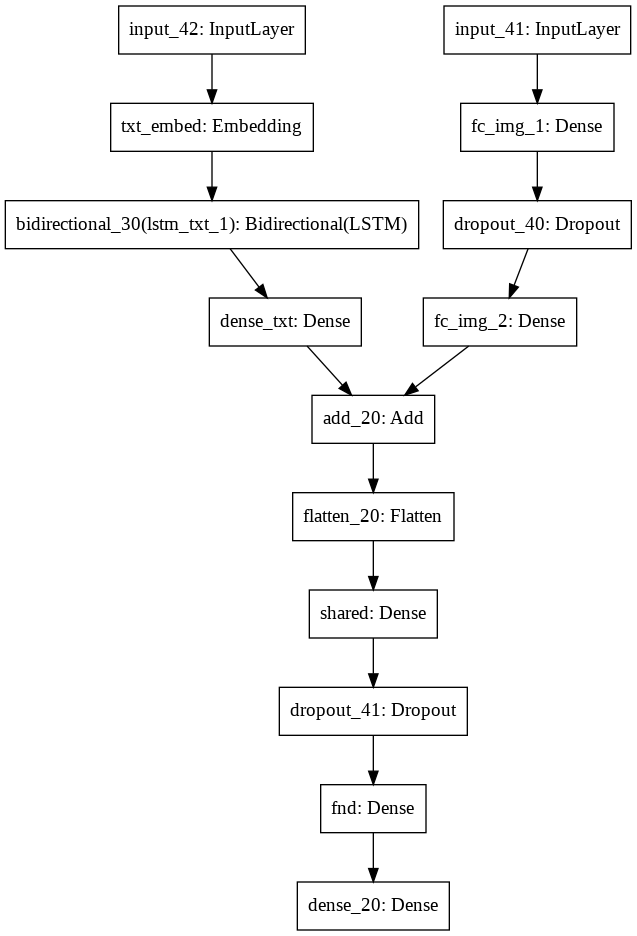

In [ ]:
plot_model(model,to_file='model.png')

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
checkpoint_cb=keras.callbacks.ModelCheckpoint("/content/drive/My Drive/Deep Learning/FakeNewsFinalDataset/CSV/Best_Main_Model1.h6",save_best_only=True,monitor='val_accuracy',mode='auto',verbose=1)

In [ ]:
model.fit(x=[train_features,embedded_docs_train],y=y_train,
          validation_data=([test_features,embedded_docs_test],y_test),
          epochs=60,batch_size=128,callbacks=[checkpoint_cb])

Epoch 1/60
21/23 [==========================>...] - ETA: 0s - loss: 0.6417 - accuracy: 0.6522WARNING:tensorflow:Model was constructed with shape (None, 4096) for input Tensor("input_45:0", shape=(None, 4096), dtype=float32), but it was called on an input with incompatible shape (None, 1, 4096).

Epoch 00001: val_accuracy improved from -inf to 0.72417, saving model to /content/drive/My Drive/Deep Learning/FakeNewsFinalDataset/CSV/Best_Main_Model1.h6
INFO:tensorflow:Assets written to: /content/drive/My Drive/Deep Learning/FakeNewsFinalDataset/CSV/Best_Main_Model1.h6/assets
23/23 [==============================] - 12s 507ms/step - loss: 0.6427 - accuracy: 0.6530 - val_loss: 0.5763 - val_accuracy: 0.7242
Epoch 2/60
21/23 [==========================>...] - ETA: 0s - loss: 0.5400 - accuracy: 0.7444
Epoch 00002: val_accuracy did not improve from 0.72417
23/23 [==============================] - 0s 16ms/step - loss: 0.5399 - accuracy: 0.7437 - val_loss: 0.6136 - val_accuracy: 0.7041
Epoch 3/60


In [ ]:
#Best_Main_Model5-->0.8947
#4-->0.9278
#3-->0.9388
#2-->0.9418

#Evaluation

In [ ]:
import keras
model=keras.models.load_model('/content/drive/My Drive/Deep Learning/FakeNewsFinalDataset/CSV/New_Best_Main_Model2.h6')

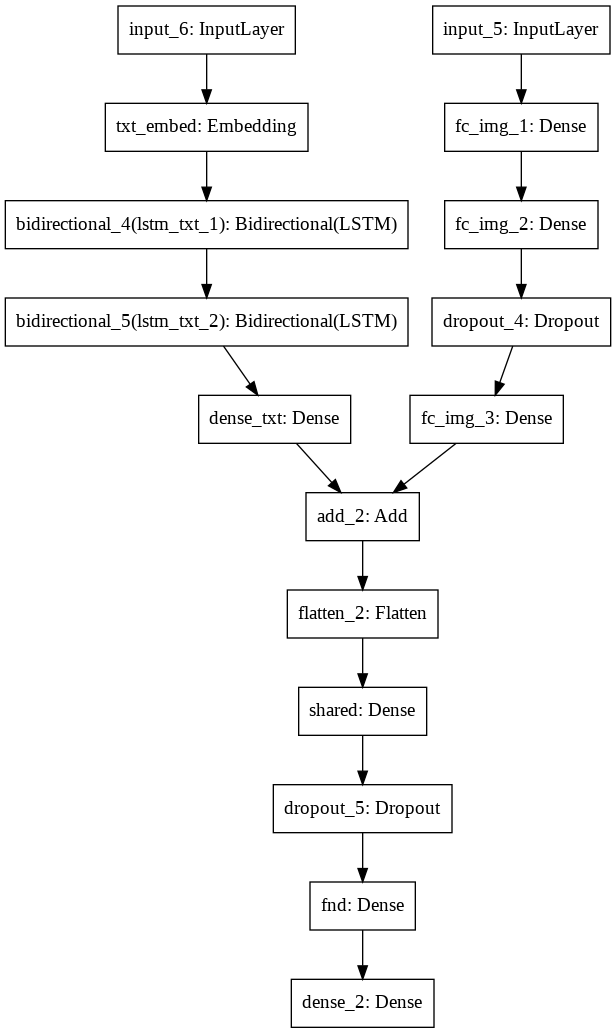

In [ ]:
plot_model(model,to_file='model.png')

In [ ]:
test_features=load(open('/content/drive/My Drive/Deep Learning/FakeNewsFinalDataset/CSV/test_features.pkl', 'rb'))

In [ ]:
test_lt=[i.reshape(-1) for i in test_features.values()]
test_lt[0].shape

(4096,)

In [ ]:
#test_lt=list(test_features.values().reshape(-1))
test_features=np.array(test_lt)
test_features.shape

(997, 4096)

In [ ]:
test_features.shape,embedded_docs_test.shape

((997, 4096), (997, 37))

In [ ]:
y_pred=model.predict([test_features,embedded_docs_test])
y_pred.shape

(997, 1)

In [ ]:
y_pred_test=[]
for i in range(len(y_pred)):
  if y_pred[i]<0.5:
    y_pred_test.append(0)
  else:
    y_pred_test.append(1)


In [ ]:
y_test

0      1
1      1
2      1
3      1
4      1
      ..
992    0
993    0
994    0
995    0
996    0
Name: type, Length: 997, dtype: int64

In [ ]:
from sklearn.metrics import accuracy_score,classification_report
acc=accuracy_score(y_test,y_pred_test)
acc

0.9408224674022067

In [ ]:
report=classification_report(y_test,y_pred_test)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.88      0.93       456
           1       0.91      0.99      0.95       541

    accuracy                           0.94       997
   macro avg       0.95      0.94      0.94       997
weighted avg       0.95      0.94      0.94       997



## Plotting Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm=confusion_matrix(y_test,y_pred_test)
print(cm)

[[400  56]
 [  3 538]]


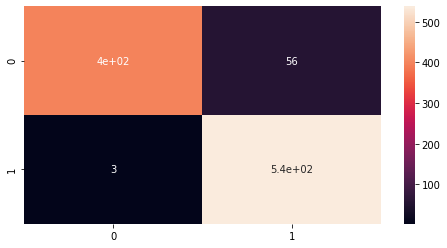

In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt

plt.figure(figsize = (8,4))
sn.heatmap(cm, annot=True)

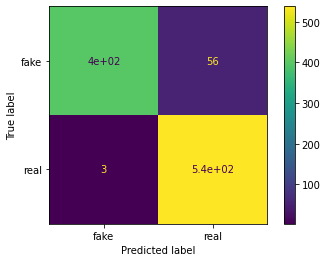

In [ ]:
cm_display=ConfusionMatrixDisplay(cm,display_labels=['fake','real'],).plot()

## Plotting ROC Curve

In [ ]:
from sklearn.metrics import roc_curve,roc_auc_score,auc,RocCurveDisplay
fpr, tpr, threshold = roc_curve(y_test, y_pred)
test_AUC = auc(fpr, tpr)
roc_auc=roc_auc_score(y_true=y_test,y_score=y_pred)
test_AUC

0.9787349612478518

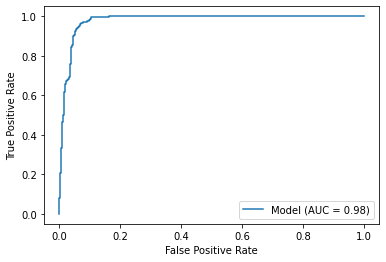

In [ ]:
roc_display=RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc,estimator_name='Model').plot()

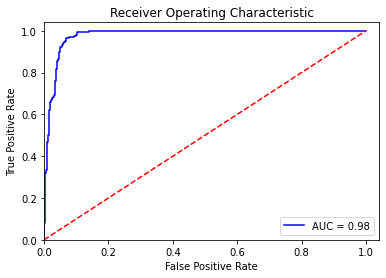

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % test_AUC)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1.04])
plt.ylim([0, 1.04])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
plt.savefig('ROC.png')

##Plotting Precision Recall Curve

In [ ]:
from sklearn.metrics import precision_recall_curve,average_precision_score
from sklearn.metrics import PrecisionRecallDisplay

precision, recall, threshold = precision_recall_curve(y_test, y_pred)

In [ ]:
average_precision=average_precision_score(y_test,y_pred)
average_precision

0.9744814092269898

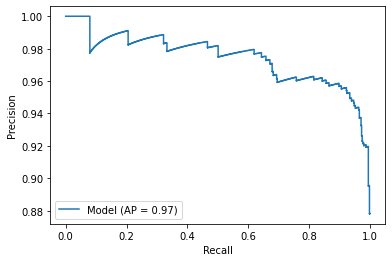

In [ ]:
pr_display=PrecisionRecallDisplay(precision=precision,recall=recall,average_precision=average_precision,estimator_name='Model').plot()


In [ ]:
fig=pr_display.figure_.savefig('Precision_Recall_curve.png')
fig